In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('churn.csv',index_col=0)

df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,?,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,?,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,?,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [2]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [3]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Isolate target data
churn_result = df['Churn?']
y = np.where(churn_result == 'True.',1,0)
# y = df.iloc[:, 20].values
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(y)
# df['Churn'] = (df['Churn?'] == 'True.')
# y = df['Churn'].as_matrix().astype(np.int)
print('There are {} instances for churn class and {} instances for not-churn classes.'.format(y.sum(), y.shape[0] - y.sum()))
print('Ratio of churn class over all instances: {:.2f}'.format(float(y.sum()) / y.shape[0]))

There are 483 instances for churn class and 2850 instances for not-churn classes.
Ratio of churn class over all instances: 0.14


In [4]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df2 = df

# We don't need these columns
to_drop = ['State','Area Code','Phone','Churn?']
churn_feat_space = df.drop(to_drop,axis=1)

# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0. later
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

X = churn_feat_space

# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = '?', strategy = 'mean', axis = 0)
# imputer = imputer.fit(X[:,1:10])
# X = imputer.transform(X[:,1:10])

X =X.replace('?','-1')

# Pull out features for future use
features = X.columns
X = X.as_matrix().astype(np.float)

# State is string and we want discre integer values
# labelencoder = LabelEncoder()
# df2['State'] = labelencoder.fit_transform(df2['State'])
# Drop the redundant columns from dataframe
# df2.drop(['Area Code','Phone','Churn','Churn?'], axis=1, inplace=True)
# Get the features as integers similar to what we did for labels(targets)
# df2[["Int'l Plan","VMail Plan"]] = df2[["Int'l Plan","VMail Plan"]] == 'yes'
# df2.head(100)

# labelencoder_X_1 = LabelEncoder()
# X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
# labelencoder_X_2 = LabelEncoder()
# X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
# onehotencoder = OneHotEncoder(categorical_features = [1])
# X = onehotencoder.fit_transform(X).toarray()
# X = X[:, 1:]

In [5]:
X

array([[ 128.  ,    0.  ,    1.  , ...,    3.  ,    2.7 ,    1.  ],
       [ 107.  ,    0.  ,    1.  , ...,    3.  ,    3.7 ,    1.  ],
       [ 137.  ,    0.  ,    0.  , ...,    5.  ,    3.29,    0.  ],
       ..., 
       [  28.  ,    0.  ,    0.  , ...,    6.  ,    3.81,    2.  ],
       [ 184.  ,    1.  ,    0.  , ...,   10.  ,    1.35,    2.  ],
       [  74.  ,    0.  ,    1.  , ...,   -1.  ,    3.7 ,    0.  ]])

In [6]:
# This is important
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Feature space holds %d observations and %d features", X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds %d observations and %d features (3333, 17)
Unique target labels: [0 1]


In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=10,shuffle=True)
    y_pred = y.copy()

    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred 

In [8]:
# from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import roc_auc_score as accuracy
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import cross_val_score

kf = KFold(len(y),n_folds=10,shuffle=True)
kf2 = StratifiedKFold(y,n_folds=10,shuffle=True)

print('Dump Classifier:               {:.3f}'.format(accuracy(y, [0 for ii in y.tolist()])))
# print('Support vector machine(SVM):   {:.3f}'.format(accuracy(y, run_cv(X, y, svm.SVC))))
# print('Decision Tree Classifier:      {:.3f}'.format(accuracy(y, run_cv(X, y, tree.DecisionTreeClassifier))))
# print('Random Forest Classifier:      {:.3f}'.format(accuracy(y, run_cv(X, y, ensemble.RandomForestClassifier))))

results = cross_val_score(ensemble.RandomForestClassifier(), X = X, y = y, scoring = "roc_auc", cv = kf)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

# print('Gradient Boosting Classifier:  {:.3f}'.format(accuracy(y, run_cv(X, y, ensemble.GradientBoostingClassifier))))
results = cross_val_score( ensemble.GradientBoostingClassifier(), X = X, y = y, scoring = "roc_auc", cv = kf)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Dump Classifier:               0.500


/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy: 0.898 (0.020)
Accuracy: 0.905 (0.024)


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X2 = sc_X.fit_transform(X)
# sc_y = StandardScaler()
# y = sc_y.fit_transform(y)

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# y_train = sc_X.fit_transform(y_train)

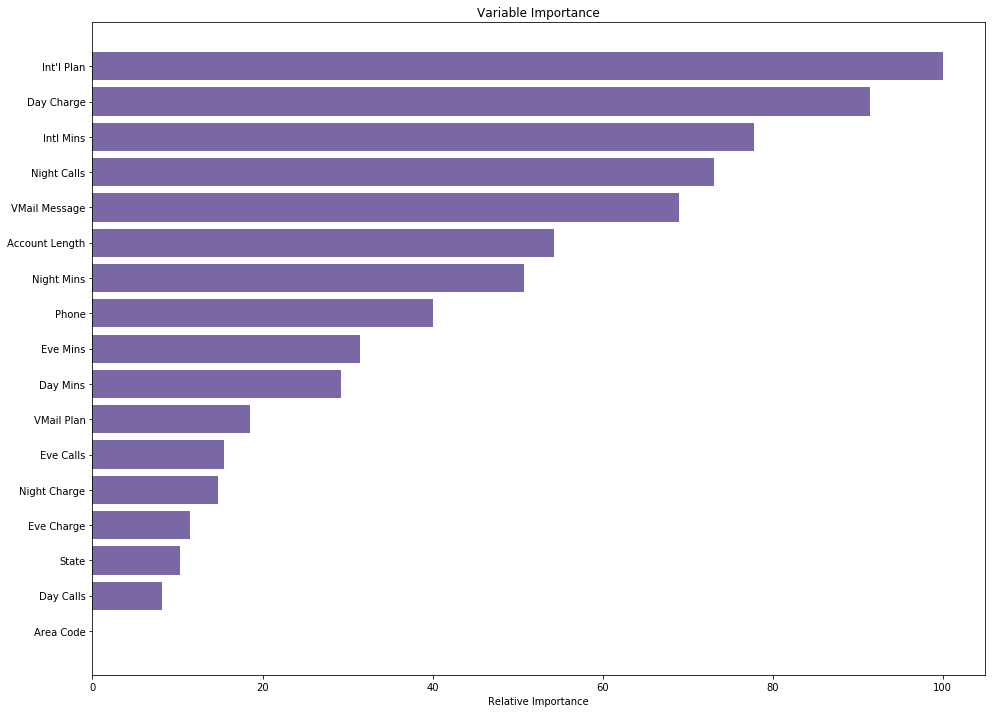

In [10]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X2, y)
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
# Normalize The Features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
plt.yticks(pos, np.asanyarray(df.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [11]:
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.layers.core import Activation, Dense, Dropout
from keras.models import Sequential

def DefineModel1():    
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=17))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [12]:
model = DefineModel1()     
model.fit(X, y, batch_size=32, epochs=50 , verbose=2)

Epoch 1/50
1s - loss: 0.3789 - acc: 0.8590
Epoch 2/50
0s - loss: 0.2934 - acc: 0.8866
Epoch 3/50
0s - loss: 0.2591 - acc: 0.9058
Epoch 4/50
0s - loss: 0.2399 - acc: 0.9136
Epoch 5/50
0s - loss: 0.2267 - acc: 0.9238
Epoch 6/50
0s - loss: 0.2167 - acc: 0.9268
Epoch 7/50
0s - loss: 0.2098 - acc: 0.9301
Epoch 8/50
0s - loss: 0.2002 - acc: 0.9394
Epoch 9/50
0s - loss: 0.1937 - acc: 0.9388
Epoch 10/50
0s - loss: 0.1877 - acc: 0.9421
Epoch 11/50
0s - loss: 0.1809 - acc: 0.9400
Epoch 12/50
0s - loss: 0.1759 - acc: 0.9466
Epoch 13/50
0s - loss: 0.1682 - acc: 0.9475
Epoch 14/50
0s - loss: 0.1653 - acc: 0.9487
Epoch 15/50
0s - loss: 0.1602 - acc: 0.9517
Epoch 16/50
0s - loss: 0.1555 - acc: 0.9517
Epoch 17/50
0s - loss: 0.1521 - acc: 0.9550
Epoch 18/50
0s - loss: 0.1467 - acc: 0.9562
Epoch 19/50
0s - loss: 0.1444 - acc: 0.9568
Epoch 20/50
0s - loss: 0.1387 - acc: 0.9583
Epoch 21/50
0s - loss: 0.1369 - acc: 0.9565
Epoch 22/50
0s - loss: 0.1328 - acc: 0.9601
Epoch 23/50
0s - loss: 0.1297 - acc: 0.96

In [13]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as accuracy
from keras.wrappers.scikit_learn import KerasClassifier
import numpy

# create model
model = KerasClassifier(build_fn=DefineModel1, epochs=50, batch_size=128, verbose=0)
# evaluate using 10-fold cross validation
# kf = KFold(len(y),n_folds=10,shuffle=True)
kf2 = StratifiedKFold(y,n_folds=10,shuffle=True, random_state=7)
results = cross_val_score(model, X, y,scoring = "roc_auc", cv=kf2)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.888 (0.029)


# Summary of roc_auc:
KerasClassifier: Accuracy: 0.888 (0.029)
RandomForestClassifier Accuracy: 0.898 (0.020)
GradientBoostingClassifier: 0.905 (0.024)